<a href="https://colab.research.google.com/github/guilherme-am/PopulationData/blob/main/CapitaisBrasileirasPop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study on Brazilian state capitals population - ML study

- This dataset include data from IBGE (Instituto Brasileiro de Geografia e Estatísticas) about the population in the principal cities of the country.

- The goal is to analyze and study Machine Learning components in the populational dataset. Discover the most increasing cities in Brazil.


---


by: Guilherme Moreira.

In [209]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import re
import json
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup

# WebScrapping from IBGE(BR)

Webscraping for get the historical data from population of the states capital cities of Brazil.

In [210]:
req = requests.get('https://censo2010.ibge.gov.br/sinopse/index.php?dados=6')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [211]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [ ]:
table_str = str(table)
df = pd.read_html(table_str)[0]
df

Including the data from the year of 2020 manually:

In [239]:
ano20 = ['539.354','413.418','2.219.580','419.652','1.499.641','512.902','306.296','1.108.975','868.075','2.686.612','890.480','817.511','1.653.461','1.025.360','664.908','2.886.698','2.521.564','365.855','6.747.815','12.325.232','1.948.626','508.826','1.488.252','906.092','618.124','1.536.097','3.055.149']
df['20203'] = ano20

- Cleansing the data

In [ ]:
dfs = df.rename(columns = lambda x : str(x)[:-1])
dfs = dfs.drop(columns='Regiã')
dfs

In [ ]:
dfs.rename(columns ={'Capita':'Capital'}, inplace=True)
dfs

* erros: 
dfs = dfs.stack().str.replace('.','').unstack()
dfs = dfs.stack().str.replace('','0').unstack()
nan_value = float("NaN")
dfs = dfs.replace("...", nan_value, inplace=True)
dfs.replace('NaN','0',inplace=True)
dfs.replace('\u2026','.', regex=True,inplace=True)
dfs.fillna(0,inplace=True)
dfs.loc[:,'1872':'2020'].astype(np.float64)
dfs

###Creating a .csv file for the WebScraping data and reinserting the csv file as a dataframe

In [242]:
dfs.to_csv('Populacao_CapitaisBR.csv', sep=',', encoding='utf-8', quotechar='"', decimal='.')

In [479]:
data = pd.read_csv('Populacao_CapitaisBR_.csv',sep=';', encoding = 'utf-8')
data.rename(columns ={'Unnamed 0':'Capital'}, inplace=True)
data

,Capital,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010,2020
0,Porto Velho,0.000,0.000,0.000,0,0,27.244,51.049,88.856,138.289,286.471,334.585,428.527,539.354
1,Rio Branco,0.000,0.000,0.000,19.930,16.038,28.246,47.882,84.845,119.815,196.871,252.885,336.038,413.418
2,Manaus,29.334,38.720,50.300,75.704,106.399,139.620,175.343,314.197,642.492,1.010.544,1.403.796,1.802.014,2.219.580
3,Boa Vista,0.000,0.000,0.000,0,0,17.247,26.168,37.062,69.627,142.902,200.383,284.313,419.652
4,Belém,61.997,50.064,96.560,236.402,206.331,254.949,402.170,642.514,949.545,1.244.688,1.279.861,1.393.399,1.499.641
5,Macapá,0.000,0.000,0.000,0,0,20.594,46.905,87.755,140.624,179.252,282.745,398.204,512.902
6,Palmas,0.000,0.000,0.000,0,0,0,0,0,3.288,24.261,137.045,228.332,306.296
7,São Luís,31.604,29.308,36.798,52.929,85.583,119.785,159.628,270.651,460.320,695.199,868.047,1.014.837,1.108.975
8,Teresina,21.692,31.523,45.316,57.500,67.641,90.723,144.799,230.168,388.922,598.411,714.583,814.230,868.075
9,Fortaleza,42.458,40.902,48.369,78.536,180.185,270.169,514.818,872.702,1.338.793,1.765.794,2.138.234,2.452.185,2.686.612


In [480]:
data.set_index('Capital')

,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010,2020
Capital,,,,,,,,,,,,,
Porto Velho,0.000,0.000,0.000,0,0,27.244,51.049,88.856,138.289,286.471,334.585,428.527,539.354
Rio Branco,0.000,0.000,0.000,19.930,16.038,28.246,47.882,84.845,119.815,196.871,252.885,336.038,413.418
Manaus,29.334,38.720,50.300,75.704,106.399,139.620,175.343,314.197,642.492,1.010.544,1.403.796,1.802.014,2.219.580
Boa Vista,0.000,0.000,0.000,0,0,17.247,26.168,37.062,69.627,142.902,200.383,284.313,419.652
Belém,61.997,50.064,96.560,236.402,206.331,254.949,402.170,642.514,949.545,1.244.688,1.279.861,1.393.399,1.499.641
Macapá,0.000,0.000,0.000,0,0,20.594,46.905,87.755,140.624,179.252,282.745,398.204,512.902
Palmas,0.000,0.000,0.000,0,0,0,0,0,3.288,24.261,137.045,228.332,306.296
São Luís,31.604,29.308,36.798,52.929,85.583,119.785,159.628,270.651,460.320,695.199,868.047,1.014.837,1.108.975
Teresina,21.692,31.523,45.316,57.500,67.641,90.723,144.799,230.168,388.922,598.411,714.583,814.230,868.075


Transforming last .csv file into Transpose and computing in another .csv file

In [259]:
dataT = data.T 
dataT.to_csv('Populacao_Capitais-BR.csv', sep=',', encoding='utf-8', quotechar='"', decimal='.')

In [398]:
df = pd.read_csv('Populacao-Capitais-BR.csv',sep=';', encoding = 'ISO-8859-1')
df.rename(columns ={'0':'Year'}, inplace=True)
df.set_index('Year')

,Porto Velho,Rio Branco,Manaus,Boa Vista,Belém,Macapá,Palmas,São Luís,Teresina,Fortaleza,Natal,João Pessoa,Recife,Maceió,Aracaju,Salvador,Belo Horizonte,Vitória,Rio de Janeiro,São Paulo,Curitiba,Florianópolis,Porto Alegre,Campo Grande,Cuiabá,Goiânia,Brasília
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,
1872,0,0,29334,0,61997,0,0,31604,21692,42458,20392,24714,116671,27703,9559,129109,0,16157,274972,31385,12651,25709,43998,0,35987,0,0
1890,0,0,38720,0,50064,0,0,29308,31523,40902,13725,18645,111556,31498,16336,174412,0,16887,522651,64934,24553,30687,52421,0,17815,0,0
1900,0,0,50300,0,96560,0,0,36798,45316,48369,16056,28793,113106,36427,21132,205813,13472,11850,811443,239820,49755,32229,73674,0,34393,0,0
1920,0,19930,75704,0,236402,0,0,52929,57500,78536,30696,52990,238843,74166,37440,283422,55563,21866,1157873,579033,78986,41338,179263,0,33678,0,0
1940,0,16038,106399,0,206331,0,0,85583,67641,180185,54836,94333,348424,90253,59031,290443,211377,45212,1764141,1326261,140656,46771,272232,49629,54394,48166,0
1950,27244,28246,139620,17247,254949,20594,0,119785,90723,270169,103215,119326,524682,120980,78364,417235,352724,50922,2377451,2198096,180575,67630,394151,57033,56204,53389,0
1960,51049,47882,175343,26168,402170,46905,0,159628,144799,514818,162537,155117,797234,170134,115713,655735,693328,85242,3307163,3825351,361309,98520,641173,74249,57860,153505,141742
1970,88856,84845,314197,37062,642514,87755,0,270651,230168,872702,270127,228418,1084459,269415,186838,1027142,1255415,136391,4315746,5978977,624362,143414,903175,143271,103427,389784,546015
1980,138289,119815,642492,69627,949545,140624,3288,460320,388922,1338793,428721,338629,1240937,409191,299422,1531242,1822221,215073,5183992,8587665,1052147,196055,1158709,298878,219477,738117,1203333


In [412]:
print(df.shape)

(13, 28)


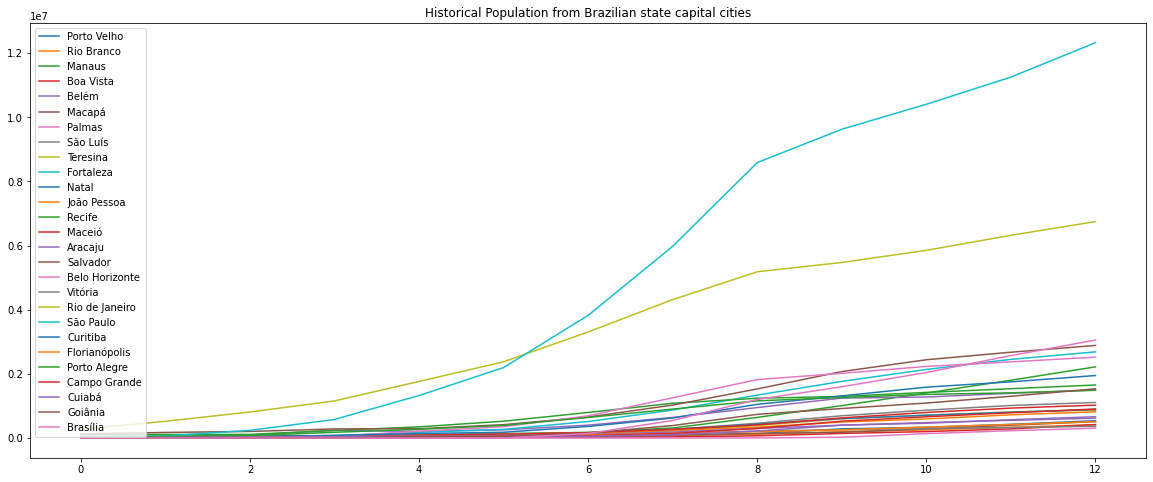

In [481]:
ax = df.loc[:,'Porto Velho':'Brasília'].plot(figsize=(20,8), title ='Historical Population from Brazilian state capital cities')

# ***Generating Individual Datasets to predict the population in each city using ML Linear Regression:***

In [448]:
dfManaus = df[['Year','Manaus']]
#dfPalmas.reset_index().rename(columns={'Palmas':'population','index':'year'})
dfM =  dfManaus[(dfManaus != 0).all(1)]
dfM.set_index('Year')

,Manaus
Year,
1872,29334
1890,38720
1900,50300
1920,75704
1940,106399
1950,139620
1960,175343
1970,314197
1980,642492


#### *Palmas (TO) Predicted Population by 2030:*

In [437]:
dfPalmas = df[['Year','Palmas']]
#dfPalmas.reset_index().rename(columns={'Palmas':'population','index':'year'})
dfP =  dfPalmas[(dfPalmas != 0).all(1)]
dfP.set_index('Year')

,Palmas
Year,
1980,3288
1991,24261
2000,137045
2010,228332
2020,306296


In [439]:
x = dfP.iloc[:, 0].values.reshape(-1, 1)
y = dfP.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2030]])
y_pred
pred = {'Year':'2030', 'Palmas': y_pred}
dfP = dfP.append(pred,ignore_index=True)
dfP.set_index('Year')
dfP.astype(np.float64)

,Year,Palmas
0,1980.0,3288.000000
1,1991.0,24261.000000
2,2000.0,137045.000000
3,2010.0,228332.000000
4,2020.0,306296.000000
5,2030.0,382464.241639


In [458]:
dfBelem = df[['Year','Belém']]
#dfPalmas.reset_index().rename(columns={'Palmas':'population','index':'year'})
dfBel =  dfBelem[(dfBelem != 0).all(1)]
dfBel.set_index('Year')

,Belém
Year,
1872,61997
1890,50064
1900,96560
1920,236402
1940,206331
1950,254949
1960,402170
1970,642514
1980,949545


In [462]:
x = dfBel.iloc[:, 0].values.reshape(-1, 1)
y = dfBel.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred_Belem = model.predict([[2030]])
y_pred_Belem

array([[1462908.64854281]])

### **São Paulo (SP) predicted Population by 2050:**

In [491]:
dfSao = df[['Year','São Paulo']]
dfSP =  dfSao[(dfSao != 0).all(1)]
dfSP.set_index('Year')

,São Paulo
Year,
1872,31385
1890,64934
1900,239820
1920,579033
1940,1326261
1950,2198096
1960,3825351
1970,5978977
1980,8587665


In [492]:
x = dfSP.iloc[:, 0].values.reshape(-1, 1)
y = dfSP.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred_SP = model.predict([[2050]])
y_pred_SP

array([[14148994.79179609]])

In [493]:
pred = {'Year':'2050', 'São Paulo': y_pred_SP}
dfSP = dfSP.append(pred,ignore_index=True)
dfSP.set_index('Year')
dfSP.astype(np.int)

,Year,São Paulo
0,1872,31385
1,1890,64934
2,1900,239820
3,1920,579033
4,1940,1326261
5,1950,2198096
6,1960,3825351
7,1970,5978977
8,1980,8587665
9,1991,9626894


#### Brasília (DF) predicted population by 2030:

In [425]:
dfBsb = df[['Year','Brasília']]
#dfPalmas.reset_index().rename(columns={'Palmas':'population','index':'year'})
dfBrasilia =  dfBsb[(dfBsb != 0).all(1)]
dfBrasilia.set_index('Year')

x = dfBrasilia.iloc[:, 0].values.reshape(-1, 1)
y = dfBrasilia.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred_bsb = model.predict([[2030]])
y_pred_bsb 
pred = {'Year':'2030', 'Brasília': y_pred_bsb}
dfBrasilia = dfBrasilia.append(pred,ignore_index=True)
dfBrasilia.set_index('Year')

,Brasília
Year,
1960,141742
1970,546015
1980,1203333
1991,1598415
2000,2043169
2010,2570160
2020,3055149
2030,[[3533420.2273793668]]


- **Method to user input city and year to predict the population then:**

In [478]:
def city_list_gen(df):
    df = df.rename(columns={'Capital':'capital'},inplace=True)
    df['capital'] = df['Capital'].apply(lambda row: row.lower())
    lists = df['capital'].unique().tolist()
    with open('capitais.json','w', encoding='utf-8') as f:
        json.dump(lists, f, ensure_ascii=False,indent=4)
    return lists, df

def selecting_city(df,city):
    df = df.loc[df['capital']==city]
    df.drop(['capital'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df[(df != 0).all(1)]
    df = df.reset_index()
    return df
def prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model
def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])

def main():
    city = input("Please input the city name: ").lower()
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('Populacao_CapitaisBR_.csv')
    lists, df = city_list_gen(df)
    if city in lists:
        df = selecting_city(df, city)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {city.upper()} population in {year} will be {result:,d}")
    else:
        print('kindly check country name spelling from country_list.json')
    
if __name__ == "__main__":
    main()

Please input the city name: palmas
Please input the year to predict: 2030


TypeError: ignored